In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle, os, sys
import matplotlib as mpl
from matplotlib.colors import LogNorm, Normalize

In [2]:
indir = '/home/mliubar/projects/rpp-kenclark/hignight/atmo_flux'
numu = pickle.load(open(os.path.join(indir, 'Level5p_IC86.2013_genie_numu.14600.rlogL.pckl'),'rb'),encoding='latin1')
nue = pickle.load(open(os.path.join(indir, 'Level5p_IC86.2013_genie_nue.12600.rlogL.pckl'),'rb'),encoding='latin1')

In [3]:
plt.rcParams.update({'font.size': 20})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

mpl.rcParams['patch.linewidth'] = 2.0
mpl.rcParams['lines.linewidth'] = 2.0

In [4]:
lw = 2.

In [5]:
asp_r = 1./12.*6.

left, width = 0.23, 0.85
bottom, height = 0.16, 0.75
bottom_h = bottom + height + 0.02
left_h = left + width + 0.02

rect1 = [left*asp_r, bottom-0.2, width, height]
rect2 = [left*asp_r, bottom, height, 0.2]

# xsec type separation

In [6]:
nu = {}
for k in numu.keys():
    if k == 'weight_e': continue
    if k == 'weight_mu': 
        nu['weight_emu'] = np.concatenate((nue['weight_e'],numu['weight_mu']))
        continue
    nu[k] = np.concatenate((nue[k],numu[k]))

In [7]:
nu.keys()

dict_keys(['ma_qe', 'mn_stopped_contained', 'weight', 'weight_noflux', 'AhtBY', 'ptype', 'GENIE_Ws', 'ma_res', 'rLogL', 'CV2uBY', 'MaNCEL', 'zenith', 'rLogL_good', 'CV1uBY', 'GENIE_ys', 'energy', 'GENIE_xs', 'MaNCRES', 'delta_llh', 'GENIE_Q2s', 'GENIE_x', 'GENIE_y', 'reco_azimuth', 'MaCOHpi', 'interaction', 'GENIE_Q2', 'weight_emu', 'GENIE_W', 'reco_energy', 'BhtBY', 'reco_zenith'])

In [8]:
def myargwh(cond):
    return np.transpose(np.argwhere(cond))[0]

In [9]:
# dis = (np.abs(numu['ma_res']).sum(axis=1) == 0)*(np.abs(numu['ma_qe']).sum(axis=1) == 0)
ind0 = myargwh(np.abs(nu['ma_res']).sum(axis=1) == 0)
ind1 = myargwh(np.abs(nu['ma_qe'][ind0]).sum(axis=1) == 0)
dis = ind0[ind1]

In [10]:
CCdis = dis[myargwh(nu['interaction'][dis]==1.)]
NCdis = dis[myargwh(nu['interaction'][dis]==2.)]
CCnotdis = ~dis[myargwh(nu['interaction'][~dis]==1.)]
NCnotdis = ~dis[myargwh(nu['interaction'][~dis]==2.)]

In [11]:
CCdisNu = CCdis[myargwh(nu['ptype'][CCdis]>0)]
NCdisNu = NCdis[myargwh(nu['ptype'][NCdis]>0)]
CCnotdisNu = CCnotdis[myargwh(nu['ptype'][CCnotdis]>0)]
NCnotdisNu = NCnotdis[myargwh(nu['ptype'][NCnotdis]>0)]

CCdisNuBar = CCdis[myargwh(nu['ptype'][CCdis]<0)]
NCdisNuBar = NCdis[myargwh(nu['ptype'][NCdis]<0)]
CCnotdisNuBar = CCnotdis[myargwh(nu['ptype'][CCnotdis]<0)]
NCnotdisNuBar = NCnotdis[myargwh(nu['ptype'][NCnotdis]<0)]

In [12]:
# val = np.log10(nu['energy'])
# glob_w = nu['weight_emu']

In [13]:
# def get_w(weight=glob_w, nyears=1, 
#           corr={'CCnu':False, 'CCnubar':False, 'NCnu':False, 'NCnubar':False}, \
#           extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'},
#           lgE_min_cust=1.68):
    
#     if nyears == 0:
#         m = 1.
#     else:
#         m = m = 365*24*60.*60.*nyears
        
#     wf = np.ones(len(glob_w))
#     if corr['CCnu']:
#         wf[CCdisNu] = wf[CCdisNu]*get_weight_iso(nu['energy'][CCdisNu], 
#                                                  nu='Nu', current='CC', 
#                                                  ext_type=extr['CCnu'],
#                                                  lgE_min_cust=lgE_min_cust)
#     if corr['CCnubar']:
#         wf[CCdisNuBar] = wf[CCdisNuBar]*get_weight_iso(nu['energy'][CCdisNuBar], 
#                                                  nu='NuBar', current='CC', 
#                                                  ext_type=extr['CCnubar'],
#                                                  lgE_min_cust=lgE_min_cust)
#     if corr['NCnu']:
#         wf[NCdisNu] = wf[NCdisNu]*get_weight_iso(nu['energy'][NCdisNu], 
#                                                  nu='Nu', current='NC', 
#                                                  ext_type=extr['NCnu'],
#                                                  lgE_min_cust=lgE_min_cust)
#     if corr['NCnubar']:
#         wf[NCdisNuBar] = wf[NCdisNuBar]*get_weight_iso(nu['energy'][NCdisNuBar], 
#                                                  nu='NuBar', current='NC', 
#                                                  ext_type=extr['NCnubar'],
#                                                  lgE_min_cust=lgE_min_cust)

#     wr = weight*m*wf
#     return wr, m

# plots

In [14]:
save_pth = '/home/mliubar/scratch/diff_xsec_testing_plots_Nov18/param_space_plots/'

In [15]:
lgE_r = [0., 3.]
nb = 20

In [16]:
asp_r = 1./12.*6.

left, width = 0.33, 0.8
bottom, height = 0.12, 0.7
bottom_h = bottom + height + 0.02
left_h = left + width + 0.02

rect1 = [left*asp_r, bottom+0.3, width, height-0.2]
rect2 = [left*asp_r, bottom, width, 0.28]

No handles with labels found to put in legend.


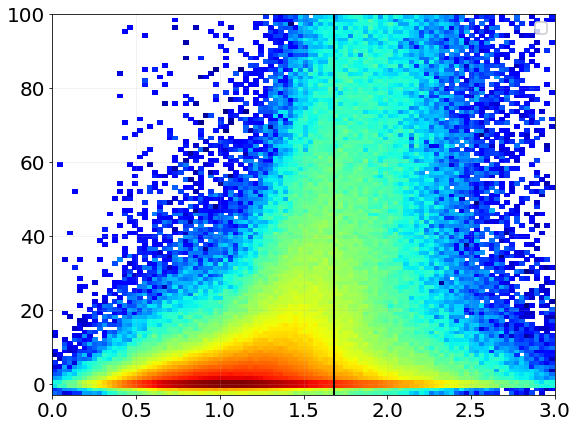

In [55]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('')

plt.hist2d(np.log10(nu['energy']), nu['delta_llh'],
           100, range=[[0.,3.],[-3., 100.]], 
           weights=nu['weight_emu'], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.


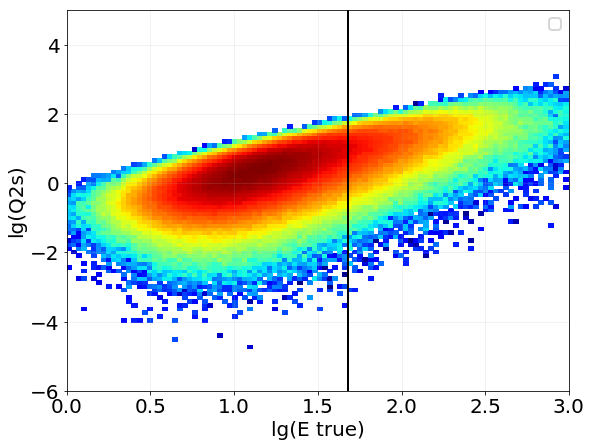

In [56]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('lg(Q2s)')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy']), np.log10(nu['GENIE_Q2s']),
           100, range=[[0.,3.],[-6., 5.]], 
           weights=nu['weight_emu'], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.


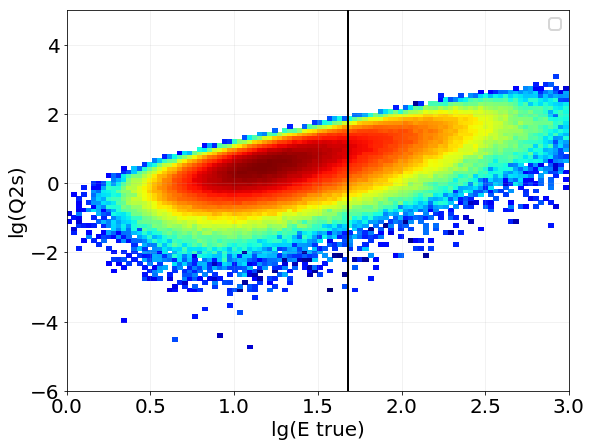

In [57]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('lg(Q2s)')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][dis]), np.log10(nu['GENIE_Q2s'][dis]),
           100, range=[[0.,3.],[-6., 5.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.


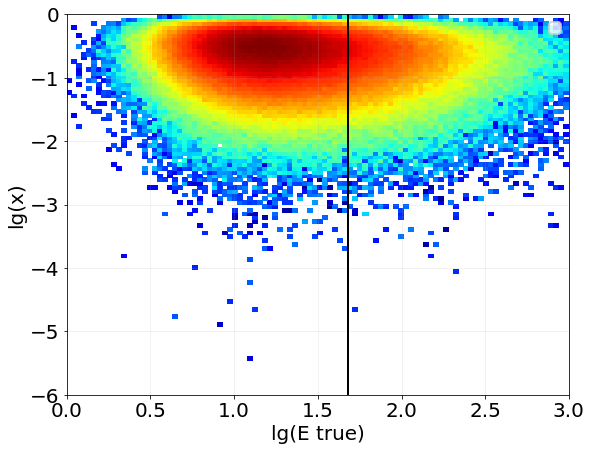

In [58]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('lg(x)')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][dis]), np.log10(nu['GENIE_xs'][dis]),
           100, range=[[0.,3.],[-6., 0.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


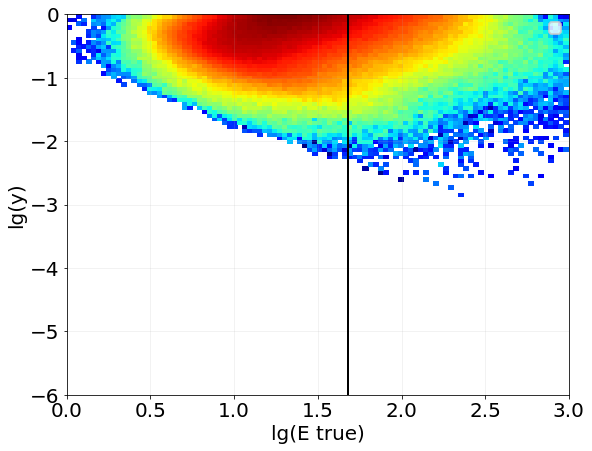

In [59]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('lg(y)')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][dis]), np.log10(nu['GENIE_ys'][dis]),
           100, range=[[0.,3.],[-6., 0.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


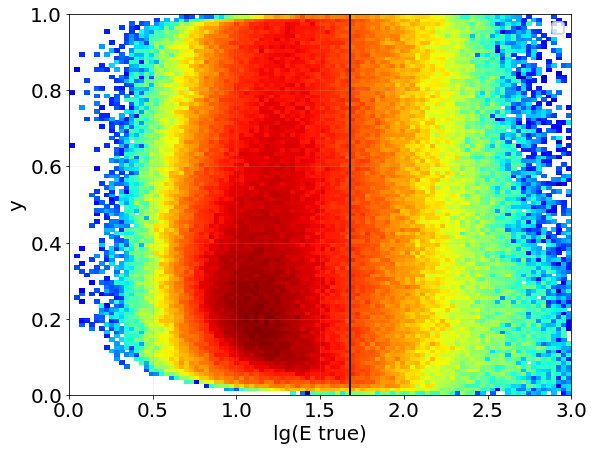

In [60]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][dis]), nu['GENIE_ys'][dis],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


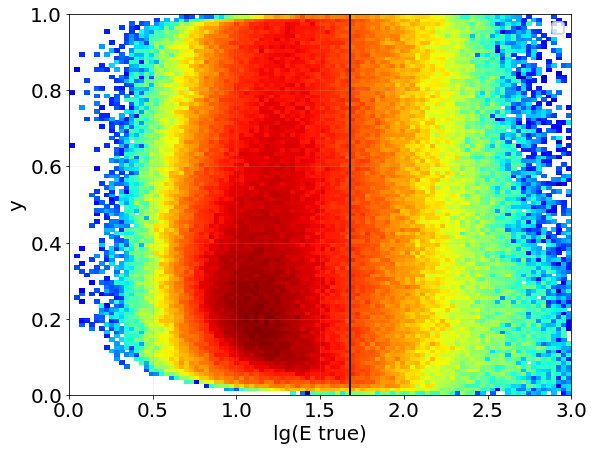

In [60]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][dis]), nu['GENIE_ys'][dis],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


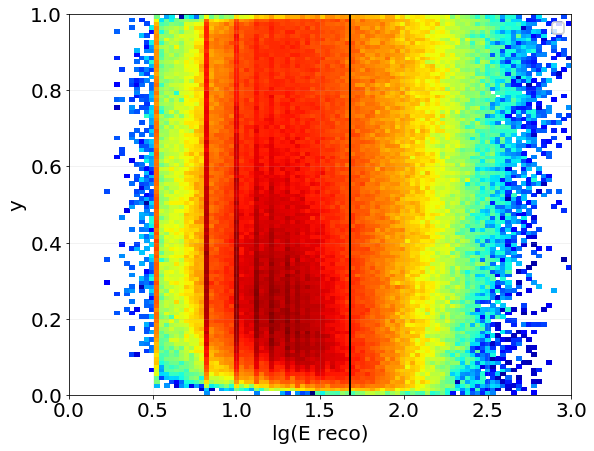

In [53]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E reco)')

plt.hist2d(np.log10(nu['reco_energy'][dis]), nu['GENIE_ys'][dis],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.


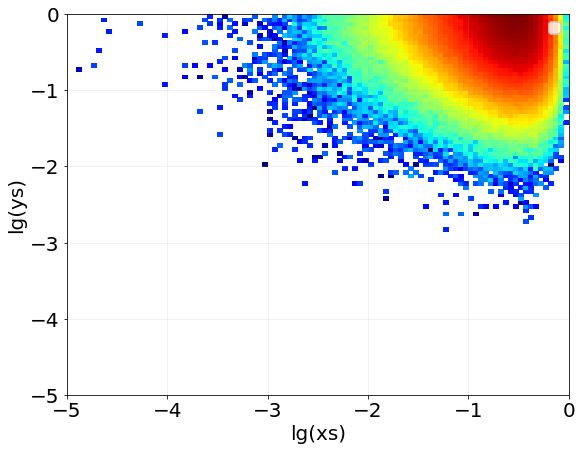

In [52]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('lg(ys)')
ax.set_xlabel('lg(xs)')

plt.hist2d(np.log10(nu['GENIE_xs'][dis]), np.log10(nu['GENIE_ys'][dis]),
           100, range=[[-5.,0.],[-5., 0.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


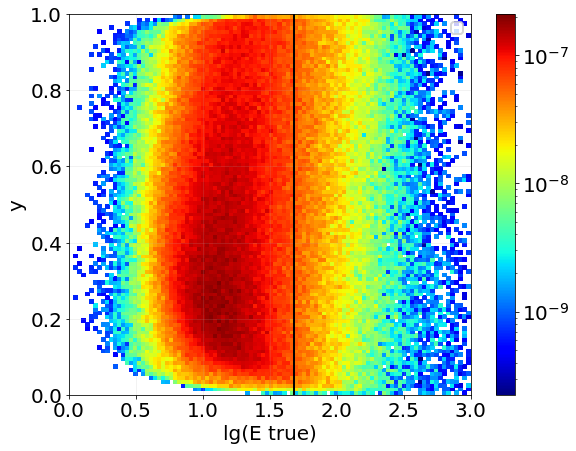

In [14]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

p=plt.hist2d(np.log10(nu['energy'][CCdisNu]), nu['GENIE_ys'][CCdisNu],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][CCdisNu], norm=LogNorm(),
           cmap='jet'
         )

fig.colorbar(p[3])
plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


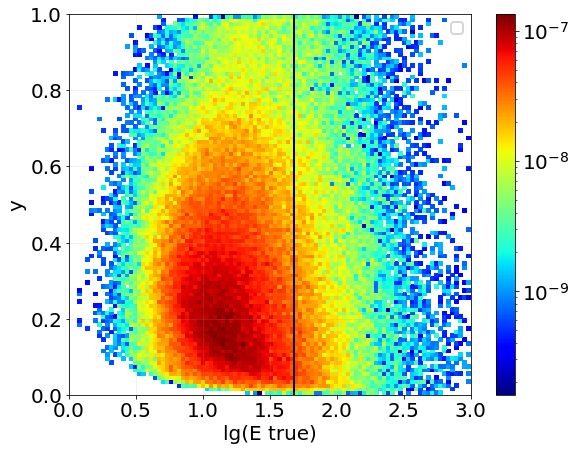

In [15]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

p=plt.hist2d(np.log10(nu['energy'][CCdisNuBar]), nu['GENIE_ys'][CCdisNuBar],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][CCdisNuBar], norm=LogNorm(),
           cmap='jet'
         )

fig.colorbar(p[3])
plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


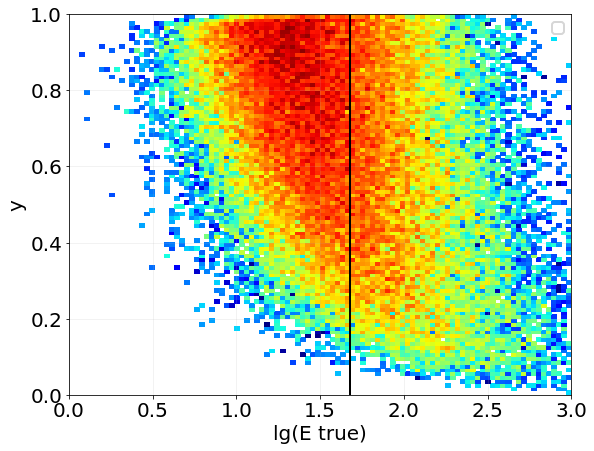

In [63]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][NCdisNu]), nu['GENIE_ys'][NCdisNu],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][NCdisNu], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


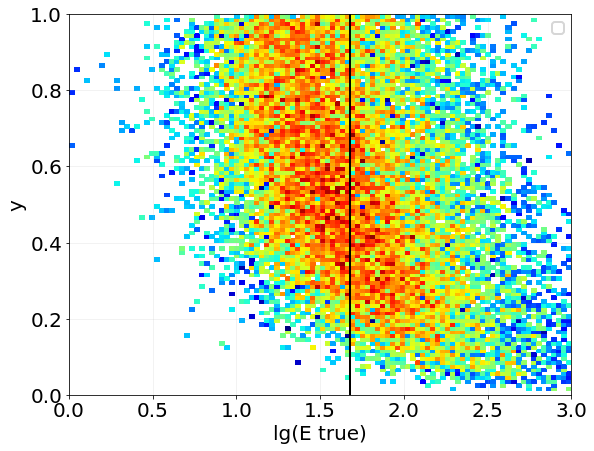

In [64]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][NCdisNuBar]), nu['GENIE_ys'][NCdisNuBar],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][NCdisNuBar], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

# BY test

In [74]:
for k in nu.keys():
    if 'BY' in k:
        print (k)

AhtBY
CV2uBY
CV1uBY
BhtBY


In [75]:
disBY = (np.abs(nu['ma_res']).sum(axis=1) == 0)*(np.abs(nu['ma_qe']).sum(axis=1) == 0)\
*((np.abs(nu['AhtBY']).sum(axis=1) != 0) | (np.abs(nu['BhtBY']).sum(axis=1) != 0) | 
  (np.abs(nu['CV1uBY']).sum(axis=1) != 0) | (np.abs(nu['CV1uBY']).sum(axis=1) != 0))

In [81]:
disBY0 = (np.abs(nu['CV1uBY']).sum(axis=1) != 0)

In [85]:
np.unique(disBY==disBY0)

array([ True])

In [87]:
for i in range(len(nu['CV1uBY'])):
    if nu['CV1uBY'][i][0] != 0:
        print (nu['CV1uBY'][i], disBY0[i])

[ 0.00107863 -0.03352462] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00276059 -0.05271271] True
[ 9.28279643e-05 -9.63578734e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00079013 -0.02813558] True
[ 0.00281306 -0.05321458] True
[ 0.00170543 -0.04138023] True
[ 0.00012112 -0.01100719] True
[ 0.00183469 -0.04292625] True
[ 0.00088544 -0.02978759] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00075415 -0.02748631] True
[ 0.00178441 -0.04233143] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0027139  -0.05226217] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00192369 -0.04395967] True
[ 0.00150089 -0.03881019] True
[ 0.00109574 -0.03372843] True
[ 0.00152347 -0.039102  ] True
[ 0.00053981 -0.02324864] True
[ 0.0003582  -0.01893422] True
[ 0.00041862 -0.02047039] True
[ 0.00347395 -0.05918192] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00091831 -0.03085752] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 8.41608892e-05 -9.29621687e

[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00047611 -0.02183229] True
[ 8.42119127e-06 -2.94831096e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 9.99947326e-06 -3.24338990e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00024766 -0.01606307] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.36293737e-06 -1.53718919e-03] True
[ 0.00115805 -0.0340768 ] True
[ 0.004431  -0.0669136] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00028661 -0.0173822 ] True
[ 2.35429005e-05 -4.93562373e-03] True
[ 5.33836355e-05 -7.48269829e-03] True
[ 0.00129166 -0.03682607] True
[ 0.00144367 -0.03806053] True
[ 0.00208873 -0.04581549] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00020662 -0.01470368] True
[ 0.00015999 -0.01294863] True
[ 8.77789787e-06 -3.03957939e-03] True
[ 0.00141033 -0.03761703] True
[ 0.00125959 -0.03651773] True
[ 0.00393086 -0.0629874 ] True
[ 0.00033622 -

[ 0.00028271 -0.01723831] True
[ 5.11264765e-05 -7.29681268e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.17533232e-05 -8.47145395e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00021867 -0.01515502] True
[ 0.00030544 -0.0178639 ] True
[ 0.00143613 -0.03796068] True
[ 0.00331151 -0.0593149 ] True
[ 0.00019825 -0.01438115] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00226598 -0.04772984] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00241929 -0.04932694] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00214908 -0.04760982] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00018435 -0.01358053] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 6.17418562e-06 -2.48480905e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.35140811e-05 -6.75253651e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00163067 -0.04137436] T

[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00025937 -0.01650947] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.44243650e-06 -1.60540302e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00025764 -0.01634397] True
[ 0.00010125 -0.01006343] True
[ 9.94469150e-06 -3.15355768e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.63802123e-05 -5.23337809e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.48865409e-05 -4.98878839e-03] True
[ 0.00042662 -0.02101665] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00133174 -0.03655059] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.51636021e-05 -8.67046705e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00083504 -0.02960086] 

[ 0.00012709 -0.01127502] True
[ 0.00012989 -0.0117045 ] True
[ 5.24741173e-06 -2.34810480e-03] True
[ 0.00010908 -0.01044562] True
[ 5.43274459e-05 -7.53859983e-03] True
[ 2.76282121e-05 -5.39219490e-03] True
[ 0.00031204 -0.0180041 ] True
[ 0.00021465 -0.01465464] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0003471 -0.0190782] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00011028 -0.01071966] True
[ 0.00101475 -0.03189342] True
[ 0.00064003 -0.0253179 ] True
[ 1.55655426e-05 -4.03647486e-03] True
[ 0.00025501 -0.01597388] True
[ 0.00120586 -0.03477513] True
[ 1.58485013e-05 -4.07161722e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.000575   -0.02399549] True
[ 4.35205593e-05 -6.59735180e-03] True
[ 0.00152669 -0.03914343] True
[ 3.33751580e-06 -1.87657916e-03] True
[ 0.00017466 -0.01351761] True
[ 0.00327688 -0.05746554] True
[ 2.07313260e-05 -4.66160134e-03] True
[ 0.0002558  -0.01599862] True
[ 6.69395008e-05 -8.35525038e-03] True

[ 0.00376879 -0.06166351] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00409678 -0.0643154 ] True
[ 0.00050707 -0.02253168] True
[ 0.00290507 -0.0540837 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00449358 -0.06738933] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00128783 -0.03594108] True
[ 0.00051746 -0.02276162] True
[ 0.00086166 -0.02938392] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00153598 -0.03926284] True
[ 4.95039169e-05 -7.13421543e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00120946 -0.03549972] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00368165 -0.06094028] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.001499   -0.03964283] True
[ 4.

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00073781 -0.02789845] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00025762 -0.01631774] True
[ 0.00010077 -0.01024188] True
[ 0.00060702 -0.02510991] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00010436 -0.0104014 ] True
[ 0.00011232 -0.01059966] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.76960055e-05 -4.31222233e-03] True
[ 0.00072482 -0.02744168] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00099745 -0.03236325] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.30844017e-05 -6.56420624e-03] True
[ 0.00012431 -0.01115108] True
[ 0.00021103 -0.01453038] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00200984 -0.04600222] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.90494590e-05 -8.89180954e-03] True
[ 8.21369708e-05 -9.27777053e-03] True
[ 4.38280645e-18 -9.93013661e-17] T

[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00069035 -0.02703942] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00030145 -0.01736861] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00069341 -0.02696058] True
[ 3.36443470e-05 -5.91737941e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00029514 -0.01718557] True
[ 4.67546760e-05 -6.83811815e-03] True
[ 5.72187183e-06 -2.45487038e-03] True
[ 2.58768223e-05 -5.08708269e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00036522 -0.01948936] True
[ 0.00082087 -0.02867864] True
[ 0.00078118 -0.0279754 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00237117 -0.04883119] True
[ 0.0010639

[ 2.45029488e-05 -5.07404612e-03] True
[ 0.00306764 -0.05558697] True
[ 0.00013385 -0.01179294] True
[ 0.00040518 -0.0201388 ] True
[ 0.00059627 -0.02492493] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00282102 -0.05329032] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00033269 -0.01824705] True
[ 0.0005291  -0.02352192] True
[ 9.36023194e-06 -3.14025388e-03] True
[ 0.00026049 -0.01649536] True
[ 1.91956615e-05 -4.46665347e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00018055 -0.01343977] True
[ 0.00165603 -0.04077409] True
[ 0.00448511 -0.06732515] True
[ 0.00042349 -0.02101929] True
[ 0.00018666 -0.01366528] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00015648 -0.01251144] True
[ 6.08523275e-05 -7.96207701e-03] True
[ 0.0028634  -0.05369173] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661

[ 3.39058056e-05 -5.95414912e-03] True
[ 0.00168566 -0.04113866] True
[ 0.00252241 -0.05037334] True
[ 1.03133854e-05 -3.29364300e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.47451809e-06 -2.80333904e-03] True
[ 9.12241337e-06 -3.02036599e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0002446  -0.01564409] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00246338 -0.05103218] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.17097802e-05 -3.50919269e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00222772 -0.04853492] True
[ 0.00331344 -0.05778773] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.74331170e-05 -7.05686009e-03] True
[ 4.38280645e-18 -9.93013661e-17] 

[ 0.00168738 -0.04199206] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00375372 -0.06153906] True
[ 0.00063661 -0.02560238] True
[ 0.00208631 -0.04578879] True
[ 0.00027463 -0.01657749] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00453905 -0.06773304] True
[ 0.00095556 -0.03094712] True
[ 0.00302691 -0.05521408] True
[ 0.0002882  -0.01727914] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00056791 -0.02423494] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00379004 -0.06183867] True
[ 0.0009294  -0.03051961] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00091822 -0.03033503] True
[ 0.00177017 -0.04216154] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00124222 -0.03588733] True
[ 0.00015221 -0.01233949] True
[ 0.00200075 -0.0457922 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0

[ 0.00329667 -0.05764013] True
[ 0.00027245 -0.0165114 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00056796 -0.02439882] True
[ 0.00014204 -0.01221546] True
[ 1.69583871e-05 -4.22188476e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 9.07817187e-07 -9.71848001e-04] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00021401 -0.01498004] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00113499 -0.03373487] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0013837  -0.03804279] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00201806 -0.04503004] True
[ 0.00134054 -0.03742003] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00011189 -0.01057928] True
[ 0.00069999 -0.02647931] True
[ 0.00070328 -0.02703729] True
[ 0.00063644 -0.02524684] True
[ 0.00044218 -0.02103902] True
[ 0.00205095 -0.0453973 ] True
[ 0.00337794 -0.05835184] Tr

[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 8.33015896e-05 -9.34972138e-03] True
[ 0.00012158 -0.01126811] True
[ 0.00108785 -0.0330251 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00057336 -0.02396126] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.75244850e-05 -4.18631261e-03] True
[ 0.0008667  -0.03006393] True
[ 0.00155506 -0.03950686] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00398316 -0.06340884] True
[ 0.00013413 -0.01185287] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 6.97343604e-05 -8.53891169e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.62357816e-05 -6.91120691e-03] True
[ 0.0031949  -0.05812017] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.52871304e-05 -5.02878183e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00038945 -0.01974364] True
[ 0.00016863 -0.01298824] True
[ 0.0002542  -0.01643258] True
[ 4.38280645e-18 -9.93013661e-17] T

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00123472 -0.03608813] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00063119 -0.02514233] True
[ 1.37559416e-05 -3.80420811e-03] True
[ 8.05177422e-05 -9.17711005e-03] True
[ 0.00055196 -0.02350918] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.73191481e-06 -1.35263894e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0044989  -0.06742963] True
[ 2.32631175e-06 -1.52522935e-03] True
[ 0.00081811 -0.02922643] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00049551 -0.02227301] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 3.55779732e-05 -6.09827561e-03] True
[ 4.38280645e-18 -9.93013661e-17] 

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00186665 -0.04330014] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.07951617e-06 -1.07116683e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.22049331e-05 -6.64322136e-03] True
[ 0.0005387  -0.02322471] True
[ 4.21003165e-05 -6.65002183e-03] True
[ 4.24411628e-05 -6.51501606e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00062668 -0.02556227] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.80534437e-05 -4.35897090e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00020215 -0.01422122] True
[ 4.36482911e-06 -2.14590188e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 5.79825196e-05 -7.80340936e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.58076409e-05 -5.19774209e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00047843 -0.0223601 ] True
[ 0.0031839  -0.05663827] True
[ 4.38280645e-18 -9.93013661e-17] 

[ 4.29668950e-05 -6.55524774e-03] True
[ 0.00034027 -0.01889169] True
[ 6.53040774e-06 -2.61482744e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.000677   -0.02675179] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00046313 -0.02153218] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00259507 -0.05109806] True
[ 0.0001311  -0.01145167] True
[ 0.00022905 -0.01513837] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.70768876e-05 -6.86164288e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00042266 -0.02097104] True
[ 0.00142002 -0.03843789] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.22059665e-05 -8.68135279e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00042566 -0.02097789] True
[ 0.00091538 -0.030

[ 0.0015581 -0.0395456] True
[ 0.00151212 -0.03895552] True
[ 0.00193788 -0.04490271] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00232377 -0.04939986] True
[ 0.00031752 -0.0178258 ] True
[ 0.00461806 -0.06832625] True
[ 0.0026141  -0.05128625] True
[ 0.0044261  -0.06687618] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00196079 -0.04524019] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0018533  -0.04392088] True
[ 0.00018649 -0.01365918] True
[ 0.00032919 -0.01815066] True
[ 0.000656   -0.02563233] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00091752 -0.03077526] True
[ 0.00166402 -0.0408727 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00106722 -0.03336414] True
[ 0.00099968 -0.03165521] True
[ 0.0007524  -0.02745429] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-1

[ 5.08215783e-05 -7.28499163e-03] True
[ 0.00225584 -0.04762238] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00077894 -0.02793524] True
[ 0.00186819 -0.04422416] True
[ 0.00228674 -0.04794913] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 5.75434729e-06 -2.46033288e-03] True
[ 0.00053198 -0.0235815 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00095274 -0.03159315] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 3.74069335e-05 -6.24426396e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00095743 -0.03154161] True
[ 0.00091607 -0.03084263] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00118001 -0.0343992 ] True
[ 0.00020853 -0.01444417] True
[ 4.38280645e-18 -9.9301366

[ 0.0001938  -0.01420223] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00015042 -0.01251477] True
[ 0.00091797 -0.030331  ] True
[ 1.41129066e-05 -3.85019139e-03] True
[ 0.00133627 -0.03739658] True
[ 0.00030932 -0.01800606] True
[ 4.73227541e-07 -6.87915745e-04] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00089371 -0.02992664] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00020288 -0.01450448] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 5.26769419e-05 -7.25834155e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.35783405e-05 -4.85588909e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00027463 -0.01692188] True
[ 0.0018406

[ 0.00027326 -0.01685007] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00051442 -0.02269476] True
[ 0.00065504 -0.02619465] True
[ 0.001444   -0.03806489] True
[ 0.00010096 -0.01029961] True
[ 0.00015024 -0.01252113] True
[ 6.59552635e-05 -8.23664520e-03] True
[ 5.53213306e-05 -7.58356204e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00288339 -0.05388009] True
[ 0.0040255  -0.06374813] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.76749505e-06 -2.18347176e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00097809 -0.03131067] True
[ 1.57972137e-05 -3.97464532e-03] True
[ 0.00042265 -0.02095888] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00017153 -0.01309976] True
[ 0.00151733 -0.03993501] True
[ 0.00099915 -0.0324117 ] True
[ 0.00014613 -0.0120907 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.79476098e-05 -5.28672508e-03] True
[ 1.95965386e-05 -4.53785456e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00171221 -0.0424

[ 7.22819641e-05 -8.69872266e-03] True
[ 1.09174060e-05 -3.30419259e-03] True
[ 0.00032849 -0.01813129] True
[ 1.76970872e-05 -4.28232917e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00012995 -0.01166638] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.84834158e-05 -4.40623630e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00164724 -0.04066529] True
[ 4.89624687e-05 -6.99772488e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.99032898e-05 -9.13539965e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00027152 -0.01681849] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 9.68330997e-06 -3.11183745e-03] True
[ 0.00024141 -0.01554198] True
[ 4.38280645e-18 -9.930136

[ 5.95347852e-06 -2.43999233e-03] True
[ 0.00037253 -0.01930949] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00021629 -0.0151123 ] True
[ 0.00027198 -0.01649726] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00408544 -0.06422549] True
[ 0.00011116 -0.01082073] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00115405 -0.03401779] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00033862 -0.01840888] True
[ 7.14367029e-05 -8.62775783e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0004259 -0.0206477] True
[ 8.99920121e-05 -9.48742411e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00038714 -0.02012426] True
[ 0.0003066  -0.01751629] True
[ 0.00220905 -0.04836002] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.22385401e-05 -4.71590001e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00027988 -0.01713168] True
[ 5.08742067e-05 -7.13304593e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 3.86267757e-05 -6.35556316e-03] True
[ 0.00

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00367645 -0.06089686] True
[ 0.00299888 -0.05495605] True
[ 0.00461818 -0.06832717] True
[ 0.00023238 -0.01524827] True
[ 0.00378968 -0.06183571] True
[ 0.00261609 -0.0513059 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00163087 -0.04046194] True
[ 0.00061711 -0.02485977] True
[ 0.00420946 -0.0652025 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00030663 -0.01780769] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00449066 -0.06736721] True
[ 0.00150752 -0.03889608] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00323005 -0.05705028] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00048661 -0.02207189] True
[ 0.00097261 -0.03122254] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00212977 -0.04626562] True
[ 0.0004359  -0.02088894] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.3

[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00159936 -0.04006772] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00364595 -0.06212359] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00045229 -0.02170692] True
[ 0.00056361 -0.0243471 ] True
[ 4.22930325e-05 -6.50363546e-03] True
[ 6.13479332e-05 -8.03310118e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00023263 -0.01554133] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 9.89446502e-05 -1.01759068e-02] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00015552 -0.01267095] True
[ 0.0003025  -0.01783854] True
[ 0.0002574 -0.0163651] True
[ 0.00011489 -0.01072034] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 3.57432896e-05 -5.97882256e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 8.70825860e-05 -9.33276853e-03] True
[ 0.00014761 -0.01215151] True
[ 1.86143011e-05 -4.39307404e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.15957537e-05 -8.46214565e

[ 0.00182266 -0.04278468] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00016448 -0.01311072] True
[ 0.00110596 -0.03329947] True
[ 3.35684079e-05 -5.93305903e-03] True
[ 5.77864391e-05 -7.75375078e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00427854 -0.06769542] True
[ 0.00018098 -0.01372117] True
[ 0.00011202 -0.01080026] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00253377 -0.05048735] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00073219 -0.02770299] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00043611 -0.02089397] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00089179 -0.02989439] True
[ 0.00017619 -0.01357698] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.17770936e-05 -4.75751682e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] T

[ 0.00063273 -0.02583138] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0003177  -0.01824727] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00012198 -0.01104598] True
[ 0.0020584  -0.04548007] True
[ 0.00037897 -0.019476  ] True
[ 0.00229867 -0.04807478] True
[ 0.00010612 -0.0103028 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00178888 -0.0423847 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.59134498e-05 -5.21894653e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00094216 -0.03148143] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00017055 -0.01306216] True
[ 0.00029745 -0.01756962] True
[ 1.24548372e-05 -3.62024259e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00074253 -0.0272734 ] True
[ 4.13247736e-05 -6.42874974e-03] True
[ 0.00296868 -0.05467663] True
[ 4.38280645

[ 2.76745528e-05 -5.37466098e-03] True
[ 7.59019228e-05 -8.88403158e-03] True
[ 4.81455995e-05 -7.04156779e-03] True
[ 0.00013779 -0.01174032] True
[ 0.00101413 -0.03256607] True
[ 5.49429514e-05 -7.54418630e-03] True
[ 5.55552415e-06 -2.41935973e-03] True
[ 1.45672940e-05 -3.81677838e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00173674 -0.0428502 ] True
[ 0.00052209 -0.0233476 ] True
[ 9.16601880e-05 -9.57497313e-03] True
[ 0.00010405 -0.01038517] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 5.22544211e-06 -2.34656137e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0004065  -0.02058783] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00276396 -0.05274506] True
[ 0.0001706  -0.01335167] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.59361564e-05 -8.71491997e-03] True
[ 0.00480825 -0.07150329] True
[ 0.00101155 -0.032

[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00043893 -0.02145332] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00265154 -0.05165449] True
[ 1.25222404e-06 -1.15062657e-03] True
[ 0.00057026 -0.02439264] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 9.23642565e-05 -9.61168488e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00019965 -0.01439091] True
[ 0.00025763 -0.01605587] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00069608 -0.02640511] True
[ 3.13229187e-05 -5.59689604e-03] True
[ 0.00066839 -0.02630614] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.53496051e-05 -6.73457363e-03] True
[ 0.00388885 -0.06449327] True
[ 0.0004817 -0.0219602] True
[ 6.37141663e-05 -7.98271838e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00021051 -0.01482

[ 0.00018887 -0.01396323] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00137239 -0.03710595] True
[ 0.00286371 -0.0536947 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00011604 -0.01077372] True
[ 0.0008918  -0.02989451] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00119762 -0.03465567] True
[ 0.00143413 -0.03793422] True
[ 0.0021726  -0.04673089] True
[ 0.00131001 -0.03625013] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0005488  -0.02344181] True
[ 0.00067067 -0.0263196 ] True
[ 0.00059927 -0.02449741] True
[ 0.00217139 -0.04671784] True
[ 0.00280254 -0.05311433] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00095324 -0.03090939] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00158845 -0.04071513] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] Tr

[ 3.07788189e-05 -5.54806862e-03] True
[ 2.66464522e-06 -1.67856677e-03] True
[ 0.00020437 -0.01429943] True
[ 0.00028973 -0.01702743] True
[ 0.00033476 -0.0187075 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00093933 -0.03140058] True
[ 0.00017231 -0.01339422] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00065067 -0.02607391] True
[ 4.88551579e-05 -7.14903526e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00153308 -0.0392256 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00016055 -0.01267329] True
[ 0.00014518 -0.01235521] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.73483462e-05 -5.32781469e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0008686  -0.02950234] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 6.14996369e-05 -7.99787527e-03] True
[ 5.85345380e-05 -7.8173415

[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 5.54471215e-05 -7.58068736e-03] True
[ 4.43330739e-06 -2.10555313e-03] True
[ 1.56403079e-05 -4.05429586e-03] True
[ 9.5375725e-05 -9.7671539e-03] True
[ 0.00199016 -0.04471622] True
[ 0.00237216 -0.04884145] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00058    -0.02409984] True
[ 4.34675385e-05 -6.74664117e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00089225 -0.02990209] True
[ 2.36153455e-05 -4.95684970e-03] True
[ 7.37719480e-05 -8.58981102e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00023551 -0.01562393] True
[ 7.52800741e-05 -8.83886080e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00067137 -0.02593144] True
[ 0.00021532 -0.01501864] True
[ 0.00248314 -0.04997742] True
[ 0.00033202 -0.01860608] True
[ 0.00231405 -0.04968543] True
[ 5.99915022e-05 -7.74596905e

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0001609  -0.01268687] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00073475 -0.02712991] True
[ 0.00068541 -0.02666118] True
[ 9.25890773e-05 -9.62337808e-03] True
[ 0.00010627 -0.01031024] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00020185 -0.01450804] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 5.81084606e-05 -7.80251649e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00037941 -0.0194871 ] True
[ 5.25747975e-06 -2.29293378e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00067513 -0.02600398] True
[ 0.00081916 -0.02864874] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 8.88713816e-05 -9.56587717e-03] True
[ 0.00040155 -0.02004824] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00365236 -0.06252356] True
[ 0.00017518 -0.01323814] True
[ 0.00105533 -0.0325265 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.

[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00013107 -0.01171896] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 6.77650237e-05 -8.38181546e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0001364  -0.01197468] True
[ 0.0001049  -0.01024317] True
[ 1.05936374e-05 -3.33827863e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.49439520e-05 -4.99453977e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.07710460e-05 -8.41325876e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.03049318e-05 -4.62127720e-03] True
[ 8.75578740e-05 -9.56166953e-03] True
[ 0.00073057 -0.0270524 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00112917 -0.03364807] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.05003419e-05 -4.64104002e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 8.86406165e-05 -9.415904

[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00075238 -0.02745403] True
[ 0.0006231  -0.02498035] True
[ 0.00074039 -0.02775543] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00085615 -0.02928969] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00154907 -0.03943038] True
[ 0.00204054 -0.04624024] True
[ 0.00077844 -0.028431  ] True
[ 0.00115575 -0.03404287] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00038766 -0.02004504] True
[ 0.00020208 -0.01443193] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00059241 -0.0248447 ] True
[ 0.00064496 -0.02541544] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00404591 -0.06391108] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00164677 -0.04065955] True
[ 0.00020936 -0.0147

[ 0.00241789 -0.04931262] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00216328 -0.04663002] True
[ 8.67757649e-05 -9.45689226e-03] True
[ 0.00081322 -0.02854444] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00466429 -0.06867111] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00017748 -0.01350898] True
[ 0.00164162 -0.04059557] True
[ 0.00054349 -0.02332788] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00086526 -0.02944551] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00112669 -0.03361093] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.000128   -0.01131545] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00011975 -0.01113583] True
[ 0.00082721 -0.02878948] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00032218 -0.01795635] True
[ 0.00049787 -0.02232618] True
[ 0.00130411 -0.0361

[ 4.11185017e-05 -6.41268361e-03] True
[ 0.00149137 -0.03969372] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00285406 -0.05360357] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00064141 -0.02534539] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0001062 -0.0105363] True
[ 0.00455998 -0.06789068] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 6.26581315e-05 -8.04625178e-03] True
[ 0.00238857 -0.05048681] True
[ 0.00029451 -0.01763981] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0025625  -0.05077442] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 3.47309245e-05 -5.97441814e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0006909  -0.02700398] True
[ 0.000884   -0.02976318] True
[ 0.0022328  -0.04737725] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00255301 -0.05067974] True
[ 0.00

[ 0.00025626 -0.01601288] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00012849 -0.01151045] True
[ 0.00015236 -0.01262548] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.60160935e-05 -4.00208718e-03] True
[ 0.00100746 -0.0325996 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.63962328e-07 -5.30313162e-04] True
[ 8.08569761e-06 -2.90675099e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.46505936e-05 -5.08556966e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00013924 -0.01196562] True
[ 1.16574434e-05 -3.49030146e-03] True
[ 0.00010656 -0.01032395] True
[ 0.00137261 -0.0378297 ] True
[ 0.00096158 -0.03156854] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.53501448e-05 -5.03504406e-03] True
[ 0.00117224 -0.03510015] True
[ 5.97078737e-05 -7.90367761e-03] True
[ 4.38280645e-18 -9

[ 4.38280645e-18 -9.93013661e-17] True
[ 7.42906637e-05 -8.61996237e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00077712 -0.02790245] True
[ 0.00171612 -0.04151015] True
[ 0.00036962 -0.01960593] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00068033 -0.0266726 ] True
[ 0.00016098 -0.01289901] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00194732 -0.04423014] True
[ 4.52995052e-05 -6.84792410e-03] True
[ 0.00103097 -0.03290349] True
[ 0.00073694 -0.02783112] True
[ 0.00053784 -0.02320624] True
[ 0.00191656 -0.04488759] True
[ 0.00453021 -0.06766633] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.26008413e-05 -6.68316861e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.09716047e-06 -1.44816121e-03] True
[ 0.00020276 -0.01451572] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 5.68317993e-06 -2.44577777e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00151957 -0.03994462] True
[ 0.00114469 -0.03387918] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00019826 -0.01408384] True
[ 0.00457997 -0.06804091] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0002767  -0.01700842] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00085633 -0.02929273] True
[ 8.72532934e-05 -9.50645868e-03] True
[ 5.26591038e-05 -7.41810793e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00072606 -0.02772021] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 3.84192699e-05 -6.19861034e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00019937 -0.01412305] True
[ 0.00151254 -0.03896097] True
[ 5.92080014e-05 -7.81190975e-03] True
[ 4.38280645e-18 -9

[ 0.00082923 -0.02882472] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00024778 -0.01574563] True
[ 0.00246627 -0.04980632] True
[ 0.00013756 -0.01191397] True
[ 0.00359122 -0.06018086] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00101661 -0.03255841] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00020256 -0.01443679] True
[ 0.00012424 -0.01114779] True
[ 0.00171837 -0.04153756] True
[ 0.00017938 -0.01339614] True
[ 0.00101684 -0.0319263 ] True
[ 0.0012357  -0.03520391] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00107315 -0.03280053] True
[ 0.00151538 -0.0397253 ] True
[ 0.00117521 -0.0349702 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00243797 -0.04951806] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.33811242e-05 -3.65807994e-03] Tr

[ 0.00017821 -0.01335232] True
[ 5.42520672e-05 -7.47188188e-03] True
[ 0.00025047 -0.01583083] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00043159 -0.02078549] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00128601 -0.03643406] True
[ 0.00110579 -0.03395193] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00040717 -0.02018816] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00049421 -0.0222439 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0034411  -0.05889925] True
[ 0.00054725 -0.02340853] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00147416 -0.03846174] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00044014 -0.02133906] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00029649 -0.01722502] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00304536 -0.05538327] True
[ 0.0008413  -0.02903405] True
[ 0.00258272 -0.0509

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00039817 -0.0199635 ] True
[ 0.00011005 -0.01069817] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00113537 -0.0345488 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.50723841e-05 -8.81220017e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.83233198e-05 -4.28066770e-03] True
[ 8.18068267e-05 -9.04558988e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00201589 -0.04607894] True
[ 0.00174958 -0.04191453] True
[ 0.0018549  -0.04316302] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.26748811e-05 -8.70015943e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00163883 -0.04163865] True
[ 3.02076981e-05 -5.49634988e-03] True
[ 0.00015558 -0.01247554] True
[ 0.00089126 -0.02988548] True
[ 0.00290412 -0.05544798] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 8.56438239e-05 -9.48838925e-03] True
[ 0.00032418 -0.018012  ] True
[ 0.00030355 -0.01742895] True
[ 0.

[ 0.00352545 -0.05962261] True
[ 0.00046215 -0.02190652] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00022367 -0.01528042] True
[ 0.00024308 -0.01559539] True
[ 0.00011127 -0.01055004] True
[ 0.00134605 -0.03674706] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.51214550e-05 -3.98436055e-03] True
[ 0.00026467 -0.01661208] True
[ 8.17461405e-06 -2.93409853e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 6.57892420e-05 -8.31035043e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.78155194e-05 -4.32292195e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0001696 -0.0130257] True
[ 0.00211293 -0.0474066 ] True
[ 0.00060529 -0.02462035] True
[ 0.00084276 -0.02905923] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.64944442e-05 -8.74690343e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00050943 -0.02311306] True
[ 0.00010858 -0.01042128] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.43890321e-

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00014021 -0.0118432 ] True
[ 0.00018643 -0.01365712] True
[ 1.76976222e-05 -4.20694247e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.35780555e-05 -8.75466219e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.1527554e-05 -3.4818233e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00011925 -0.01113839] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00250441 -0.05142229] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00090856 -0.0301748 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.72902252e-06 -1.35338988e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00212217 -0.04722801] True
[ 4.54198485e-05 -6.88557247e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00011225 -0.01084782] True
[ 0.00060426 -0.02459927] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 9.96391156e-05 -1.01206083e-02] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00020102 

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00033463 -0.01864633] True
[ 0.00011572 -0.01103727] True
[ 0.00150251 -0.03883109] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00128504 -0.03672801] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00044499 -0.02153908] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00057413 -0.02457924] True
[ 5.25811731e-05 -7.43119789e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.49162374e-05 -3.91562625e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.05236251e-06 -2.72441559e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00012965 -0.01164239] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00084999 -0.02918394] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 5.99021304e-05 -7.92366850e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.88834009e-05 -4.45365044e-03] True
[ 2.59842963e-05 -5.21785111e-03] True
[ 0.0002324

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0036181  -0.06040756] True
[ 0.00418183 -0.06498606] True
[ 0.00083959 -0.02951591] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0040478  -0.06392614] True
[ 0.00479089 -0.07154997] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00325715 -0.05895003] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.41133657e-05 -3.84313352e-03] True
[ 0.0008777  -0.03042481] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00206353 -0.04553698] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00010149 -0.01031076] True
[ 0.00153723 -0.03927881] True
[ 4.27998072e-05 -6.67117920e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.05214158e-05 -4.62461360e-03] True
[ 0.00026345 -0.01651278] True
[ 4.38280645e-18 -9.93013661e-17] T

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00143932 -0.03873071] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00405263 -0.06396466] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00083397 -0.02890713] True
[ 0.00180202 -0.04254068] True
[ 0.00052945 -0.02302411] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00013377 -0.01178561] True
[ 0.00181125 -0.04264999] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00059473 -0.02484108] True
[ 0.00082542 -0.02929019] True
[ 0.00123069 -0.03513226] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00104119 -0.03230722] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00374604 -0.06147547] True
[ 0.00110523 -0.03328852] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00046384 -0.02154882] True
[ 0.00199284 -0.04474645] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00368764 -0.06099027] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] Tr

[ 0.00056125 -0.02370655] True
[ 1.43643473e-05 -3.88619771e-03] True
[ 0.00420246 -0.06514775] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.11279080e-05 -4.71135382e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.99950537e-06 -1.41404202e-03] True
[ 0.00011848 -0.01113887] True
[ 1.05668240e-05 -3.33485828e-03] True
[ 3.10687723e-05 -5.70969329e-03] True
[ 0.00011161 -0.01056579] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0002303  -0.01517963] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00223778 -0.04900971] True
[ 0.00024394 -0.01595973] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00320998 -0.05687149] True
[ 9.30759627e-05 -9.88567504e-03] True
[ 4.3828064

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00132685 -0.03735865] True
[ 2.87305059e-06 -1.69501332e-03] True
[ 0.00025727 -0.01604449] True
[ 4.31334717e-06 -2.13302568e-03] True
[ 0.00091831 -0.03033655] True
[ 0.00036865 -0.01970362] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00037755 -0.0194393 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.92567893e-05 -4.38835603e-03] True
[ 4.36609413e-06 -2.12709350e-03] True
[ 0.00020092 -0.01417803] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 9.92741195e-06 -3.23135444e-03] True
[ 0.0002716  -0.01685034] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00030523 -0.01775069] True
[ 0.00104206 -0.03310962] True
[ 0.00064295 -0.02594995] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 9.40773394e-05 -9.87121910e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00085536 -0.02927613] T

[ 6.87528976e-05 -8.48103716e-03] True
[ 0.00047145 -0.02218172] True
[ 0.00307229 -0.05741939] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 8.03421363e-06 -2.90188796e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00071147 -0.02669597] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00012453 -0.01132273] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00146207 -0.03946299] True
[ 1.90471988e-05 -4.46766394e-03] True
[ 0.00032025 -0.0183167 ] True
[ 0.00098365 -0.03139968] True
[ 0.00054231 -0.02330258] True
[ 0.00104035 -0.03229413] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00236341 -0.04875073] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 1.30618659e-05 -3.70597885e-03] True
[ 0.0001442  -0.01201018] True
[ 5.46287864e-05 -7.39160762e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] T

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00162845 -0.04043187] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00255197 -0.05066938] True
[ 0.00110431 -0.03327467] True
[ 0.00038156 -0.01954243] True
[ 0.00291106 -0.05413979] True
[ 0.00418767 -0.06631267] True
[ 0.00368521 -0.06096996] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00180078 -0.04325195] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00321462 -0.05691282] True
[ 0.00382241 -0.06210455] True
[ 0.0019813  -0.04545169] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00454407 -0.06777084] True
[ 0.00087055 -0.0295355 ] True
[ 0.00022179 -0.01489658] True
[ 0.0004389  -0.02096095] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00036646 -0.01944721] True
[ 0.00011133 -0.01055271] True
[ 0.00053261 -0.02309298] True
[ 0.00370396 -0.06112623] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.15494386e-05 -6.60697618e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00011195 -0.01081

[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0006013  -0.02491545] True
[ 0.00016894 -0.01300041] True
[ 0.00024613 -0.0156932 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00049714 -0.02230969] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00054916 -0.02344935] True
[ 0.00055725 -0.02362167] True
[ 0.00054391 -0.02333695] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00231022 -0.04819606] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00120329 -0.03473791] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00290945 -0.05412472] True
[ 0.00175313 -0.04195721] True
[ 0.00265584 -0.05169656] True
[ 0.00105074 -0.03245549] True
[ 0.0034913 -0.0593308] True
[ 0.00178625 -0.04235331] True
[ 0.00066252 -0.02575972] True

[ 1.48569381e-05 -3.85453778e-03] True
[ 8.49763372e-05 -9.41954898e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00014868 -0.01219571] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0002132  -0.01460492] True
[ 1.20885427e-05 -3.47690801e-03] True
[ 0.00011075 -0.01052495] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0006473 -0.026181 ] True
[ 0.00162081 -0.04033653] True
[ 0.00134137 -0.03746056] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 9.72190868e-05 -1.00782200e-02] True
[ 0.00026939 -0.01680468] True
[ 0.00047579 -0.02182486] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.22529620e-05 -6.61367161e-03] True
[ 0.00012687 

[ 0.00016594 -0.01312966] True
[ 0.00295615 -0.05456037] True
[ 4.33842427e-05 -6.73510729e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00328475 -0.057535  ] True
[ 2.72885991e-06 -1.69885054e-03] True
[ 0.00025093 -0.01621625] True
[ 0.00028105 -0.01710731] True
[ 0.00028294 -0.01682656] True
[ 0.00035462 -0.01911926] True
[ 0.00047127 -0.02206564] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00029966 -0.01731684] True
[ 2.01258298e-06 -1.41865873e-03] True
[ 0.00236801 -0.04984502] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00058949 -0.02429631] True
[ 0.0003233  -0.01798743] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00133463 -0.03659027] True
[ 4.36175146e-05 -6.76418900e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00019568 -0.01434315] True
[ 0.00109405 -0.03388439] True
[ 0.00019127 -0.01408053] True
[ 0.00095291 -0.03177739] True
[ 0.00078358 -0.02861489] True
[ 9.23176363e

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00100412 -0.03239592] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00010785 -0.0105836 ] True
[ 0.0001071  -0.01057649] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00141918 -0.03773535] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0014556  -0.03916571] True
[ 0.00198678 -0.04467805] True
[ 0.00013565 -0.01193025] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00014771 -0.01240273] True
[ 0.00187245 -0.04336761] True
[ 0.00011745 -0.01083916] True
[ 0.0019131  -0.04383794] True
[ 0.00019795 -0.01431994] True
[ 0.0004529  -0.02129285] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00126222 -0.03558079] True
[ 0.00096284 -0.03183868] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0006112  -0.02474043] True
[ 0.00047501 -0.02230282] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00195435 -0.04527511] True
[ 4.38280645e

[ 3.50069195e-05 -6.01686981e-03] True
[ 0.00353646 -0.06133144] True
[ 3.15765186e-06 -1.82620351e-03] True
[ 4.51494997e-05 -6.81128154e-03] True
[ 0.00013406 -0.01179913] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00404719 -0.0639213 ] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00128623 -0.03682268] True
[ 2.32701258e-05 -4.94410046e-03] True
[ 0.00047497 -0.02220239] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00105301 -0.03249058] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00105972 -0.03259418] True
[ 5.93009674e-05 -7.70125356e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 7.83385409e-05 -9.08297321e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0

[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00145094 -0.03815665] True
[ 0.00232702 -0.04837193] True
[ 0.00044555 -0.02150144] True
[ 0.00150701 -0.03961163] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00029448 -0.01716653] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00178392 -0.04295261] True
[ 0.00015141 -0.01245889] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00153299 -0.03922443] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00028965 -0.0172831 ] True
[ 0.00054675 -0.02339786] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00169665 -0.04193351] True
[ 0.00039453 -0.01987207] True
[ 0.00330969 -0.05895763] True
[ 0.00094522 -0.03137169] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00037543 -0.0193

[ 0.00068797 -0.02625051] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00048556 -0.02254145] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.00018472 -0.01389834] True
[ 0.00037701 -0.01984858] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 0.0002424  -0.01557381] True
[ 2.21394680e-05 -4.77196731e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 2.41696187e-05 -5.03609535e-03] True
[ 2.77924035e-05 -5.39665844e-03] True
[ 5.52727291e-06 -2.41206148e-03] True
[ 3.03125157e-05 -5.50587819e-03] True
[ 2.12828051e-05 -4.61344548e-03] True
[ 1.38720988e-06 -1.17780068e-03] True
[ 0.00057805 -0.02448497] True
[ 2.82161918e-05 -5.38505134e-03] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17] True
[ 4.38280645e-18 -9.93013661e-17]

KeyboardInterrupt: 

In [88]:
nu['CV1uBY'][disBY0]

array([[ 1.07862997e-03, -3.35246224e-02],
       [ 4.38280645e-18, -9.93013661e-17],
       [ 4.38280645e-18, -9.93013661e-17],
       ...,
       [ 4.38280645e-18, -9.93013661e-17],
       [ 4.38280645e-18, -9.93013661e-17],
       [ 4.61337528e-07, -6.99332131e-04]])

In [89]:
nu['CV1uBY'][~disBY0]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [79]:
disnotBY = ((np.abs(nu['ma_res']).sum(axis=1) != 0) ^ (np.abs(nu['ma_qe']).sum(axis=1) != 0))\
*((np.abs(nu['AhtBY']).sum(axis=1) == 0) * (np.abs(nu['BhtBY']).sum(axis=1) == 0) *
  (np.abs(nu['CV1uBY']).sum(axis=1) == 0) * (np.abs(nu['CV1uBY']).sum(axis=1) == 0))

No handles with labels found to put in legend.


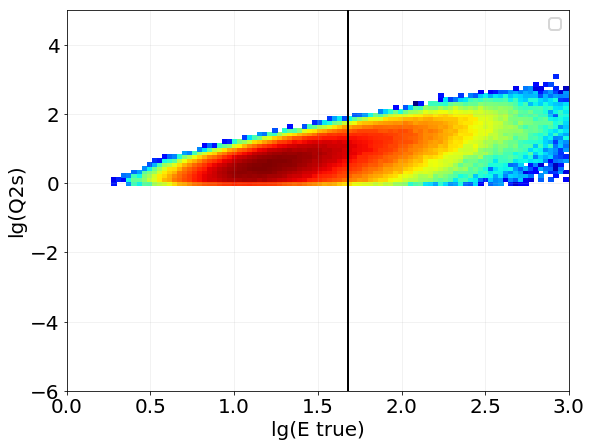

In [76]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('lg(Q2s)')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][disBY]), np.log10(nu['GENIE_Q2s'][disBY]),
           100, range=[[0.,3.],[-6., 5.]], 
           weights=nu['weight_emu'][disBY], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


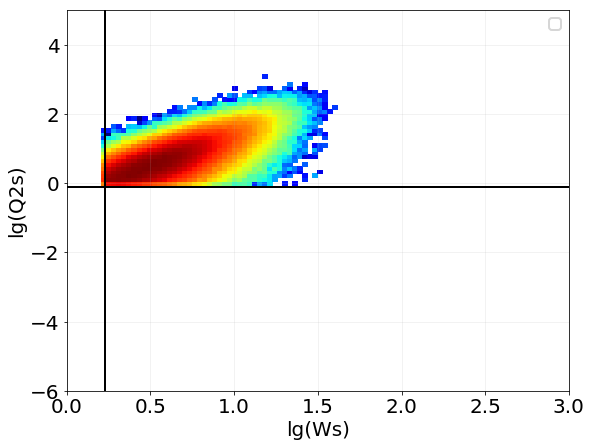

In [93]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('lg(Q2s)')
ax.set_xlabel('lg(Ws)')

plt.hist2d(np.log10(nu['GENIE_Ws'][disBY]), np.log10(nu['GENIE_Q2s'][disBY]),
           100, range=[[0.,3.],[-6., 5.]], 
           weights=nu['weight_emu'][disBY], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(np.log10(1.7), c='k')
ax.axhline(np.log10(0.8), c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


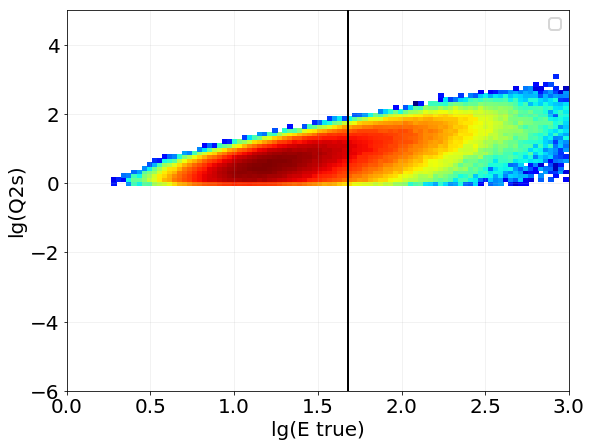

In [82]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('lg(Q2s)')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][disBY0]), np.log10(nu['GENIE_Q2s'][disBY0]),
           100, range=[[0.,3.],[-6., 5.]], 
           weights=nu['weight_emu'][disBY0], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


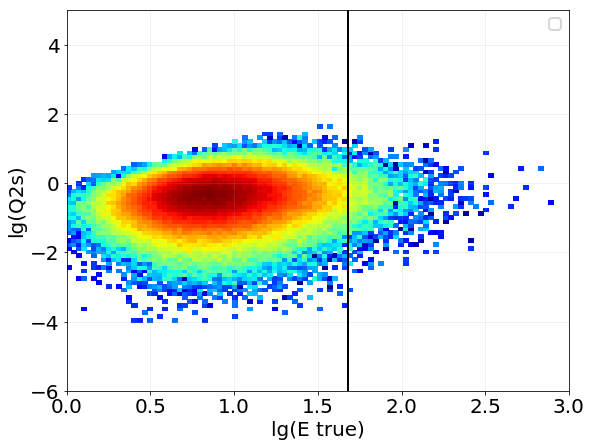

In [80]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('lg(Q2s)')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][disnotBY]), np.log10(nu['GENIE_Q2s'][disnotBY]),
           100, range=[[0.,3.],[-6., 5.]], 
           weights=nu['weight_emu'][disnotBY], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

In [165]:
xv = np.array([-2,-1,0,1,2])
yv = np.array([0.99887828, 0.99943931, 1., 1.00056035, 1.00112036])

In [166]:
af = np.polyfit(xv, yv, deg = 2)#[::-1]

In [167]:
av = np.polyval(af, xv)

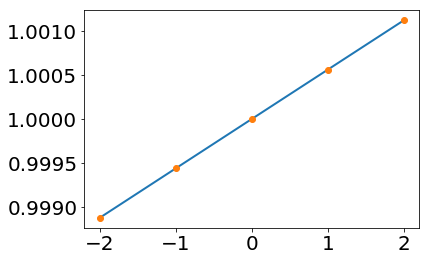

In [168]:
plt.plot(xv, av)
plt.plot(xv, yv, 'o')

In [169]:
af

array([-1.7000e-07,  5.6052e-04,  1.0000e+00])

In [170]:
af[::-1]

array([ 1.0000e+00,  5.6052e-04, -1.7000e-07])

In [171]:
nu['AhtBY'][disBY0]

array([[-2.34712979e-05,  4.66219292e-03],
       [ 1.33265673e-05,  1.85492031e-02],
       [-2.23274387e-04,  2.84480844e-02],
       ...,
       [-3.22703625e-06,  8.21162479e-04],
       [-5.08473025e-07,  3.59119724e-04],
       [-4.74306445e-08,  6.49084749e-04]])

In [172]:
from numpy.polynomial.polynomial import polyfit, polyval
from copy import deepcopy

In [173]:
af = polyfit(xv, yv, deg = 2)#[::-1]

In [174]:
av = polyval(xv, af)

In [175]:
av

array([0.99887828, 0.99943931, 1.        , 1.00056035, 1.00112036])

In [176]:
af_oscfit = deepcopy(af)
af_oscfit[0] = 1.

In [177]:
av_oscfit = polyval(xv, af_oscfit)

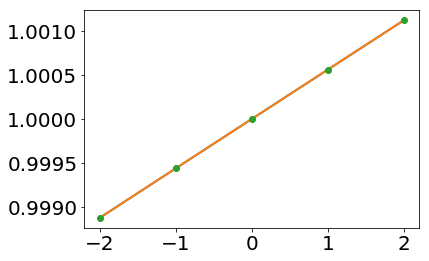

In [178]:
plt.plot(xv, av)
plt.plot(xv, av_oscfit)
plt.plot(xv, yv, 'o')

In [179]:
af

array([ 1.0000e+00,  5.6052e-04, -1.7000e-07])

In [180]:
af_oscfit

array([ 1.0000e+00,  5.6052e-04, -1.7000e-07])

In [181]:
af[::-1]

array([-1.7000e-07,  5.6052e-04,  1.0000e+00])

In [182]:
len(nu['GENIE_Q2'])

926260

In [44]:
# dis = (np.abs(numu['ma_res']).sum(axis=1) == 0)*(np.abs(numu['ma_qe']).sum(axis=1) == 0)
ind0 = myargwh(np.abs(nu['ma_res']).sum(axis=1) == 0)
ind1 = myargwh(np.abs(nu['ma_qe'][ind0]).sum(axis=1) == 0)
# indQ2 = myargwh(nu['GENIE_Q2s'][ind0[ind1]] > 0.8)
dis = ind0[ind1]

No handles with labels found to put in legend.


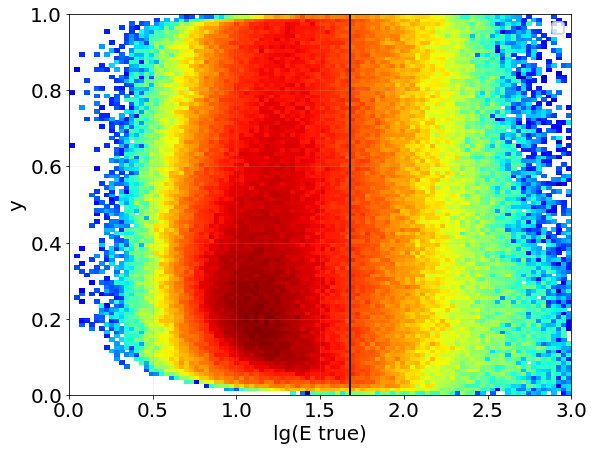

In [24]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][dis]), nu['GENIE_ys'][dis],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

In [21]:
# dis = (np.abs(numu['ma_res']).sum(axis=1) == 0)*(np.abs(numu['ma_qe']).sum(axis=1) == 0)
ind0 = myargwh(np.abs(nu['ma_res']).sum(axis=1) == 0)
ind1 = myargwh(np.abs(nu['ma_qe'][ind0]).sum(axis=1) == 0)
indQ2 = myargwh(nu['GENIE_Q2s'][ind0[ind1]] > 0.8)
dis = ind0[ind1[indQ2]]

No handles with labels found to put in legend.


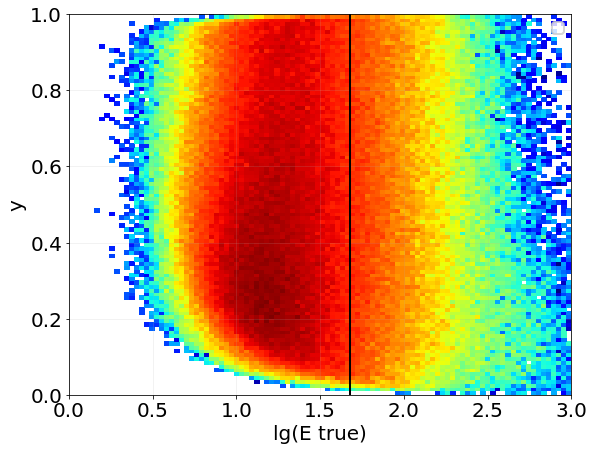

In [22]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][dis]), nu['GENIE_ys'][dis],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

In [25]:
# dis = (np.abs(numu['ma_res']).sum(axis=1) == 0)*(np.abs(numu['ma_qe']).sum(axis=1) == 0)
ind0 = myargwh(np.abs(nu['ma_res']).sum(axis=1) == 0)
ind1 = myargwh(np.abs(nu['ma_qe'][ind0]).sum(axis=1) == 0)
indQ2 = myargwh(nu['GENIE_Q2s'][ind0[ind1]] < 0.8)
dis = ind0[ind1[indQ2]]

No handles with labels found to put in legend.


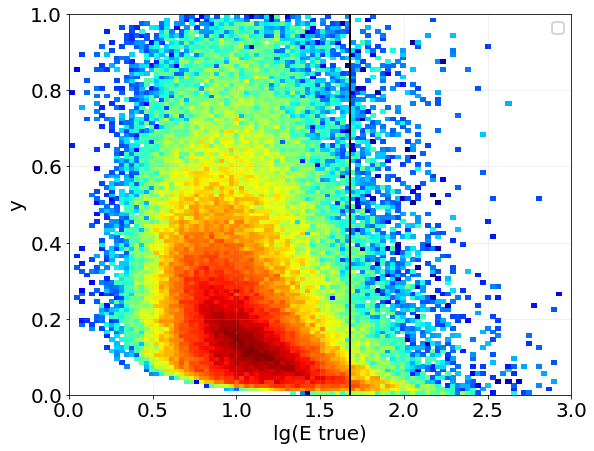

In [26]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][dis]), nu['GENIE_ys'][dis],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

In [27]:
dis = ((np.abs(nu['ma_res']).sum(axis=1) == 0) * (np.abs(nu['ma_qe']).sum(axis=1) == 0))

No handles with labels found to put in legend.


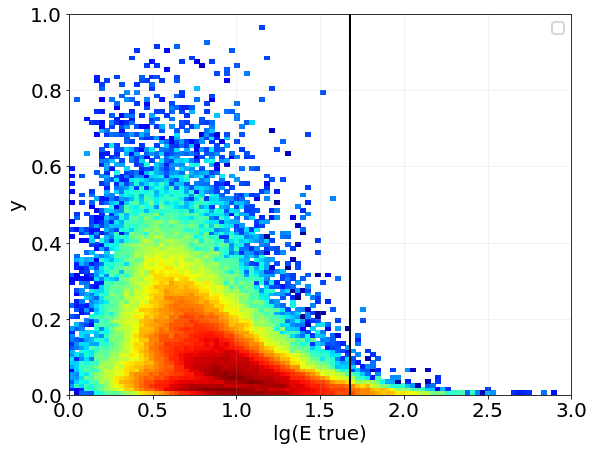

In [29]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][~dis]), nu['GENIE_ys'][~dis],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][~dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

In [30]:
res = (np.abs(nu['ma_res']).sum(axis=1) != 0)

No handles with labels found to put in legend.


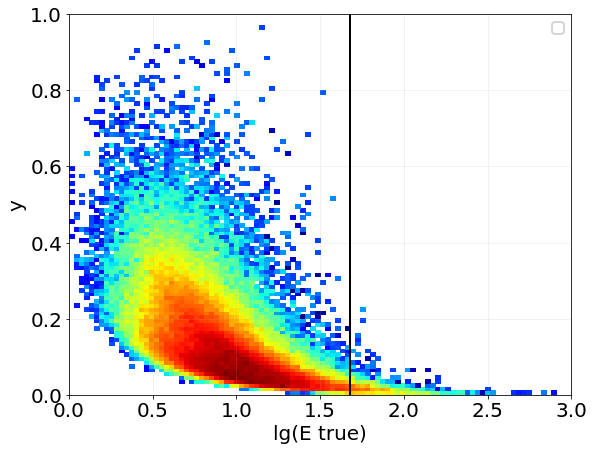

In [31]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][res]), nu['GENIE_ys'][res],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][res], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

In [34]:
qe = (np.abs(nu['ma_qe']).sum(axis=1) != 0)

No handles with labels found to put in legend.


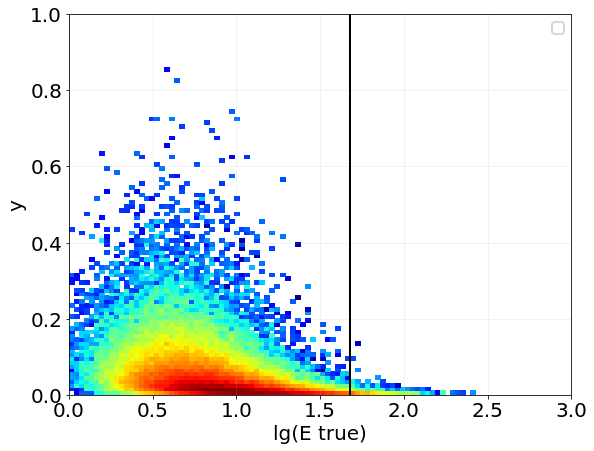

In [35]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
# ax.set_ylim(y_r)
# ax.set_title(title)
ax.set_ylabel('y')
ax.set_xlabel('lg(E true)')

plt.hist2d(np.log10(nu['energy'][qe]), nu['GENIE_ys'][qe],
           100, range=[[0.,3.],[0., 1.]], 
           weights=nu['weight_emu'][qe], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


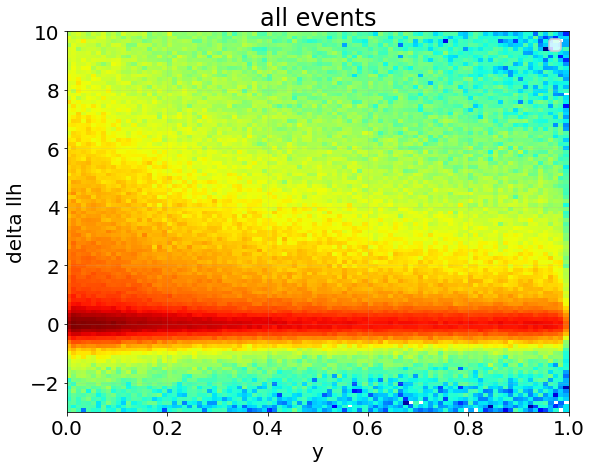

In [47]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
ax.set_title('all events')
ax.set_ylabel('delta llh')
ax.set_xlabel('y')

plt.hist2d(nu['GENIE_ys'], nu['delta_llh'],
           100, range=[[0., 1.],[-3.,10.]], 
           weights=nu['weight_emu'], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


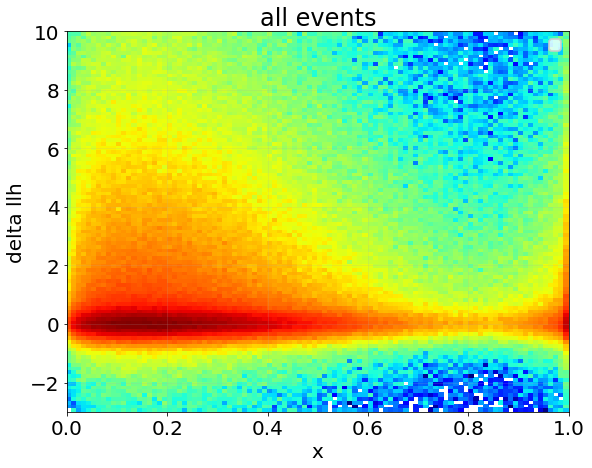

In [48]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
ax.set_title('all events')
ax.set_ylabel('delta llh')
ax.set_xlabel('x')

plt.hist2d(nu['GENIE_xs'], nu['delta_llh'],
           100, range=[[0., 1.],[-3.,10.]], 
           weights=nu['weight_emu'], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


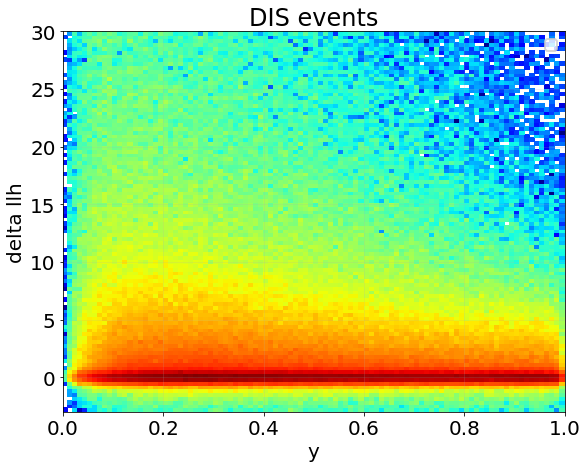

In [53]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
ax.set_title('DIS events')
ax.set_ylabel('delta llh')
ax.set_xlabel('y')

plt.hist2d(nu['GENIE_ys'][dis], nu['delta_llh'][dis],
           100, range=[[0., 1.],[-3.,30.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


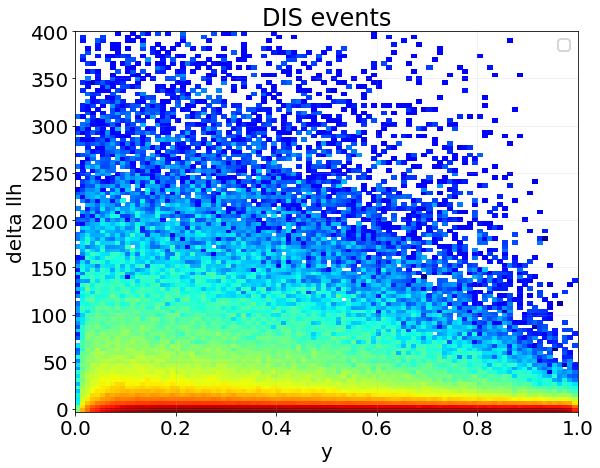

In [57]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
ax.set_title('DIS events')
ax.set_ylabel('delta llh')
ax.set_xlabel('y')

plt.hist2d(nu['GENIE_ys'][dis], nu['delta_llh'][dis],
           100, range=[[0., 1.],[-3.,400.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

No handles with labels found to put in legend.


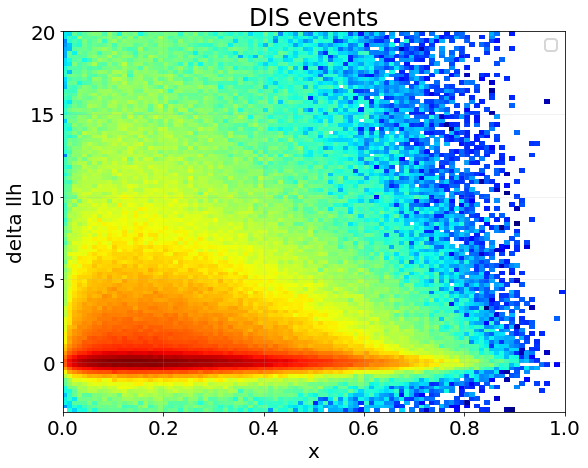

In [59]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_xlim(0.,3.1)
ax.set_title('DIS events')
ax.set_ylabel('delta llh')
ax.set_xlabel('x')

plt.hist2d(nu['GENIE_xs'][dis], nu['delta_llh'][dis],
           100, range=[[0., 1.],[-3.,20.]], 
           weights=nu['weight_emu'][dis], norm=LogNorm(),
           cmap='jet'
         )

plt.grid(alpha=0.2)
ax.axvline(1.68, c='k')
plt.legend(fontsize=15)
plt.show()

In [17]:
ind_casc = ((nu['delta_llh']<=2.) * (nu['delta_llh']>-3.))

In [18]:
ind_tr = (nu['delta_llh']>2.)

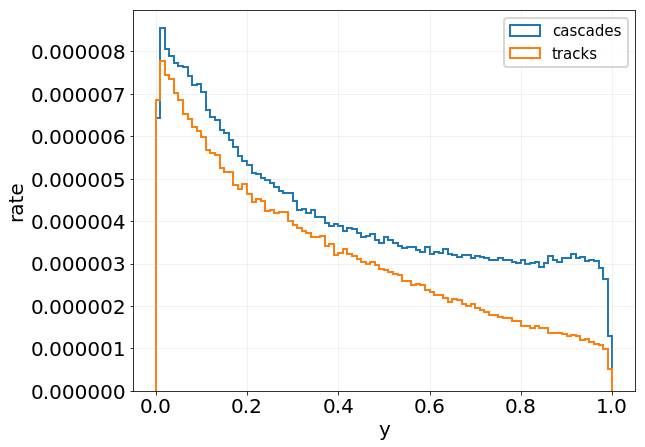

In [81]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_title('')
ax.set_ylabel('rate')
ax.set_xlabel('y')

cascY, be, _ = plt.hist(nu['GENIE_ys'][ind_casc],
           100, range=[0., 1.], 
           weights=nu['weight_emu'][ind_casc], 
           histtype='step',
           label='cascades'
         )

trY, _, _ = plt.hist(nu['GENIE_ys'][ind_tr],
           100, range=[0., 1.], 
           weights=nu['weight_emu'][ind_tr], 
           histtype='step',
           label='tracks'
         )

plt.grid(alpha=0.2)
plt.legend(fontsize=15)
plt.show()

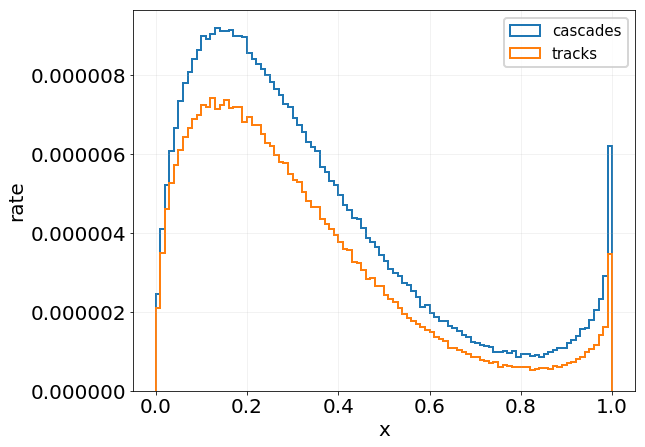

In [87]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_title('')
ax.set_ylabel('rate')
ax.set_xlabel('x')

cascX, be, _ = plt.hist(nu['GENIE_xs'][ind_casc],
           100, range=[0., 1.], 
           weights=nu['weight_emu'][ind_casc], 
           histtype='step',
           label='cascades'
         )

trX, _, _ = plt.hist(nu['GENIE_xs'][ind_tr],
           100, range=[0., 1.], 
           weights=nu['weight_emu'][ind_tr], 
           histtype='step',
           label='tracks'
         )

plt.grid(alpha=0.2)
plt.legend(fontsize=15)
plt.show()

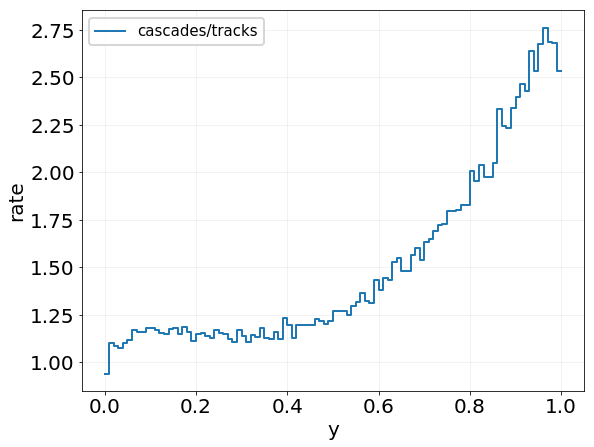

In [84]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_title('')
ax.set_ylabel('rate')
ax.set_xlabel('y')

plt.step(be, np.concatenate(([(cascY/trY)[0]],cascY/trY)),
           
           label='cascades/tracks'
         )



plt.grid(alpha=0.2)
plt.legend(fontsize=15)
plt.show()

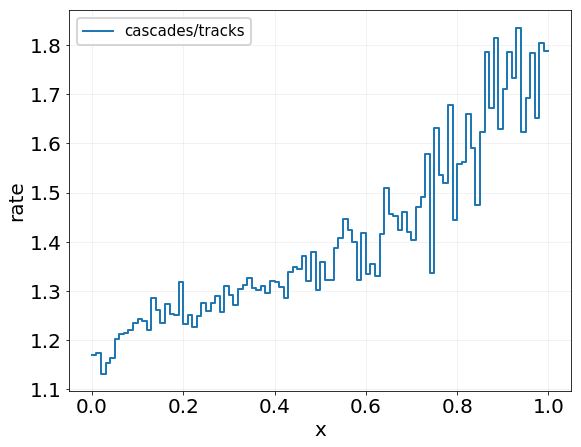

In [88]:
fig = plt.figure(1, figsize=(9, 7))
ax = plt.gca()

ax.set_title('')
ax.set_ylabel('rate')
ax.set_xlabel('x')

plt.step(be, np.concatenate(([(cascX/trX)[0]],cascX/trX)),
           
           label='cascades/tracks'
         )



plt.grid(alpha=0.2)
plt.legend(fontsize=15)
plt.show()